<div class='alert alert-info'>
    <h1 align="center">Linear Regression</h1>
    <h3 align="center">Mohammad Rahdar</h3>
</div>

In [1]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

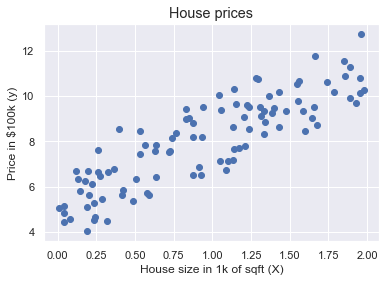

In [2]:
np.random.seed(0)  # for reproducibility

# Generate some random data between 0 and 2
X = 2 * np.random.rand(100,)

# Generate target values using a linear relationship with some added random noise
y = 5 + 3 * X + np.random.randn(100,)

plt.plot(X, y, 'o')
plt.title('House prices', size='large')    # set the title
plt.ylabel('Price in $100k (y)')           # set the y axis label
plt.xlabel('House size in 1k of sqft (X)') # set the x axis label
plt.show()

# Linear Regression with SciPy

In this lab, you learn how to find a relationship between features and a target. For a simple uni variable linear regression, the model has two parameters `b` and `w` whose values are fit using training data. Once the model parameters are determined, the model can be used to make predictions on new data.

Python has methods for finding a relationship between data-points and to draw a line of linear regression instead of going through the mathematic formula. Let's do the example again.
```python
scipy.stats.linregress(x, y=None, alternative='two-sided')
```
**parameters:**
* `x, y` : Array - Two sets of measurements. Both arrays should have the same length. If only x is given (and y=None), then it must be a two-dimensional array where one dimension has length 2.
* `alternative` {‘two-sided’, ‘less’, ‘greater’}, optional. Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:
  * `'two-sided'`: the slope of the regression line is nonzero
  * `'less'`: the slope of the regression line is less than zero
  * `'greater'`: the slope of the regression line is greater than zero
  
**Returns:** The return value is an object with the following attributes:
* `slope` : float - Slope of the regression line.
* `intercept` : float - Intercept of the regression line.
* `rvalue` : float - The Pearson correlation coefficient. The square of `rvalue` is equal to the coefficient of determination.
* `pvalue` : float - The p-value for a hypothesis test whose null hypothesis is that the slope is zero.
* `stderr` : float - Standard error of the estimated slope (gradient), under the assumption of residual normality.
* `intercept_stderr` : float - Standard error of the estimated intercept, under the assumption of residual normality.

In [3]:
# Calculate a linear least-squares regression for two sets of measurements
result = stats.linregress(X, y)

print('b: %.4f' %result.intercept)
print('w: %.4f' %result.slope)

b: 5.2222
w: 2.9685


In [4]:
print('p-value: %.4f' %result.pvalue)

p-value: 0.0000


The `result.pvalue` provides the p-value associated with the hypothesis test that the slope of the regression line is zero. The p-value is a measure of the probability of observing the data if the null hypothesis were true. In the context of linear regression, the null hypothesis states that there is no linear relationship between the independent variable (x) and the dependent variable (y), meaning that the slope of the regression line is zero. 

Here's how to interpret the p-value:

- **Low p-value (< 0.05)**: If the p-value is less than a chosen significance level (commonly 0.05), it indicates strong evidence against the null hypothesis. In other words, it suggests that the observed relationship between the independent and dependent variables is statistically significant, and the null hypothesis can be rejected. 

- **High p-value (> 0.05)**: If the p-value is greater than the significance level, it suggests weak evidence against the null hypothesis. In this case, there is insufficient evidence to conclude that the observed relationship between the variables is statistically significant, and the null hypothesis cannot be rejected.

A low p-value, as we see in this example, indicates that the linear relationship between the independent and dependent variables is statistically significant.

In [5]:
print('R2: %.4f' %result.rvalue**2)

R2: 0.7470


The `result.rvalue` represents the correlation coefficient between the independent variable (x) and the dependent variable (y). It measures the strength and direction of the linear relationship between the two variables.

The correlation coefficient (`rvalue`) ranges from -1 to 1. Positive value indicates a positive linear relationship between the variables. As the value of one variable increases, the value of the other variable tends to increase as well. On the other hand, negative value indicates a negative linear relationship between the variables.

Values closer to 1 or -1 indicate a stronger linear relationship, while values closer to 0 indicate a weaker linear relationship. If the correlation coefficient is close to 0, it suggests little to no linear relationship between the variables.

The squared value of the correlation coefficient is also known as the coefficient of determination or R-squared (`R^2`). It represents the proportion of the variance in the dependent variable (`y`) that is explained by the independent variable (`x`). A higher `R^2` value indicates a better fit of the regression line to the data.

In [6]:
# Predicctions using the fitted line
y_pred_scipy = result.slope * X + result.intercept

The formula to calculate `R^2` is as follows:

$$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y}_i)^2} $$

In [7]:
y_bar = np.mean(y) # target variable mean

r2 = 1 - np.sum((y - y_pred_scipy)**2) / np.sum((y - y_bar)**2)

print('R2: %.4f' %r2)

R2: 0.7470


## Data points against the fitted line

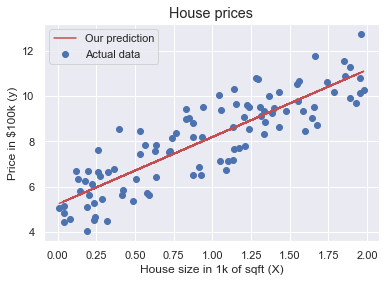

In [8]:
plt.scatter(X, y, marker="o", c="b", label="Actual data") # plot the data points
plt.plot(X, y_pred_scipy, c="r", label="Our prediction")    # plot the prediction model

plt.title('House prices', size='large')  # set the title
plt.ylabel('Price in $100k (y)')           # set the y axis label
plt.xlabel('House size in 1k of sqft (X)') # set the x axis label
plt.legend()
plt.show()

## Residual plots

Plotting the residuals against the independent variable is a common way to visualize the performance of a linear regression model. Residuals are the differences between the actual target values (observed data) and the predicted values obtained from the linear regression model. By plotting the residuals against the independent variable (input variable), you can check for any patterns or trends that may suggest issues with the model's fit.

Interpretation:
* If the points in the plot are randomly scattered around the zero-error line, it suggests that the linear regression model is capturing the relationship between the independent and dependent variables well, and the residuals have no apparent pattern.
* If there is a pattern or trend in the plot, such as a curved line or a systematic increase/decrease in residuals with the independent variable, it may indicate that the linear model is not the best fit for the data. In such cases, you might want to consider more complex models or investigate if there are other features influencing the target variable that should be included in the model.

Plotting the residuals against the predicted values is another common way to assess the performance of a regression model, not just limited to linear regression. This plot helps to visualize how well the model captures the variability in the data and whether the residuals exhibit any patterns or trends with respect to the predictions.

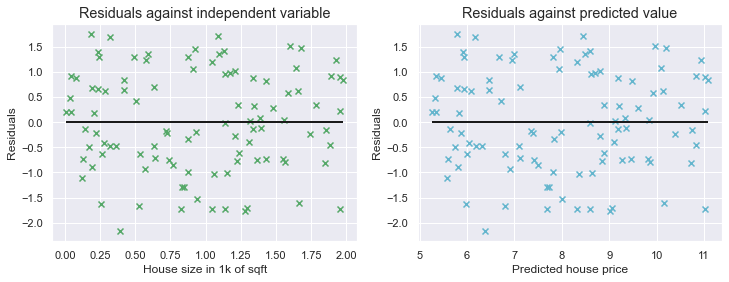

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X, y_pred_scipy - y,  marker="x", c="g")
plt.hlines(y = 0, xmin=min(X), xmax=max(X), linewidth = 2, color='k')

plt.title('Residuals against independent variable', size='large')
plt.ylabel('Residuals')
plt.xlabel('House size in 1k of sqft')

plt.subplot(1,2,2)
plt.scatter(y_pred_scipy, y_pred_scipy - y,  marker="x", c="c")
plt.hlines(y = 0, xmin = min(y_pred_scipy), xmax = max(y_pred_scipy), linewidth = 2, color='k')

plt.title('Residuals against predicted value', size='large')
plt.ylabel('Residuals')
plt.xlabel('Predicted house price')

plt.show()

# Linear Regression with scikit-learn

Here's an explanation of the inputs and returns of the Linear Regression model from scikit-learn (`sklearn`):

**parameters:**
* `X`: array - The independent variables or features used to train the linear regression model. It can be a 1D or 2D array-like object (e.g., list, numpy array) where each row represents a sample and each column represents a feature.

* `y`: array - The dependent variable or target variable associated with the independent variables in X. It should be a 1D array-like object (e.g., list, numpy array) containing the target values corresponding to each sample in X.

**Returns:**
* `model`: LinearRegression object - An instance of the LinearRegression class fitted to the training data (X, y). The model has attributes such as coefficients and intercept learned from the training data, which can be accessed after fitting the model.

**Attributes of the Fitted Model**
* `coef_`: array-like, shape (n_features, ) - The coefficients of the linear regression model. It contains the estimated coefficients (slopes) for each feature in the input data. The number of coefficients matches the number of features in the input data.

* `intercept_`: float or array-like, shape (n_targets, ) - The intercept term of the linear regression model. It represents the value of the predicted target variable when all feature values are zero.

**Methods of the Fitted Model**
* `fit(X, y)`: Fits the linear regression model to the training data (X, y). Estimates the coefficients and intercept using the least squares method to minimize the residual sum of squares between the observed and predicted target values.

* `predict(X)`: Predicts the target variable for new input data X using the fitted linear regression model. Returns the predicted target values based on the input features X.

* `score(X, y)`: Computes the coefficient of determination (R^2) of the fitted linear regression model on the given test data (X, y). Returns the R^2 score, which measures the proportion of the variance in the target variable explained by the independent variables.

In [10]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


You should call `.reshape()` on x because this array must be two-dimensional, or more precisely, it must have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of `.reshape()` specifies.
The next step is to create a linear regression model and fit it using the existing data. Create an instance of the class `LinearRegression`, which will represent the regression model. With `.fit()`, you calculate the optimal values of the weights $b$ and $w$, using the existing input and output, x and y, as the arguments. In other words, `.fit()` fits the model. 

In [11]:
model = LinearRegression().fit(X, y)

Once you have your model fitted, you can get the results to check whether the model works satisfactorily and to interpret it. You can obtain the coefficient of determination, 𝑅², with `.score()` called on model.The attributes of model are `.intercept_`, which represents the coefficient $b$, and `.coef_`, which represents $w$. The result for `.intercept_` is a scalar, while `.coef_` is an array.

In [12]:
print('b: %.4f' %model.intercept_) # intercept
print('w: %.4f' % model.coef_)     # slope

r_sq = model.score(X,y)  # coefficient of determination

print('R2:', '%.4f' %r_sq)

b: 5.2222
w: 2.9685
R2: 0.7470


Once you have a satisfactory model, then you can use it for predictions with either existing or new data. To obtain the predicted response, use `.predict()`.

In [13]:
# Price prediction for a house with the size of 1250 square feet

print('Price for a house with size of 1250 sqft is $%.2fk.' %(model.predict([[1.25]])*100))

Price for a house with size of 1250 sqft is $893.27k.


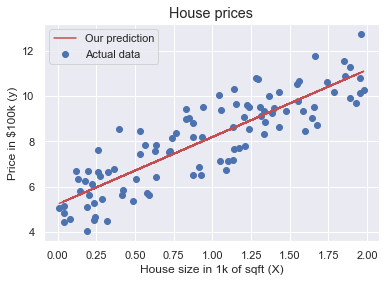

In [14]:
y_pred_skl = model.predict(X)

# If there is only one feature, you can use the following code to plot the data
plt.scatter(X, y, marker="o", c="b", label="Actual data")
plt.plot(X, y_pred_skl, c="r", label="Our prediction")

plt.title('House prices', size='large')  # set the title
plt.ylabel('Price in $100k (y)')           # set the y axis label
plt.xlabel('House size in 1k of sqft (X)') # set the x axis label
plt.legend()
plt.show()

# Another Example

With the help of `make_regression` function, we can generate a random regression dataset with a specified number of samples, features, and noise.

In [15]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [16]:
# Generate synthetic data with outliers
X, y = make_regression(n_samples=500, n_features=5, noise=40, random_state=14)

## Spliting data into train and test datasets

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

## Scaling data

Scaling the features ensures that they have similar scales, which can lead to better convergence and performance of the regression models, especially for algorithms sensitive to feature scales, such as gradient descent-based methods.

It's generally recommended to scale data after spliting data into training and testing sets. This is because scaling and imputation are usually done using parameters learned from the training set, and the same parameters are then applied to the testing set. Applying feature scaling before splitting the data can prevent information leakage on the test set, which shouldn't be available until training is complete.

1. **Standardization (Z-score normalization)**:
   - Standardization scales the features so that they have a mean of 0 and a standard deviation of 1. Each feature is transformed independently.
   $$ z = \frac{x - \mu}{\sigma} $$
     where $ x $ is the original feature, $ \mu $ is the mean of the feature, $ \sigma $ is the standard deviation of the feature, and $ z $ is the standardized feature.
   - It preserves the shape of the original distribution. It's suitable for algorithms that assume features are normally distributed, and it is less sensitive to outliers compared to min-max scaling.

2. **Min-max scaling (Normalization)**:
   - Min-max scaling scales the features to a fixed range, typically between 0 and 1. Each feature is transformed independently.
   $$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$
     where $ x $ is the original feature, $ x' $ is the scaled feature, $ \text{min}(x) $ is the minimum value of the feature, and $ \text{max}(x) $ is the maximum value of the feature.
   - It maintains the relative relationships between the values of each feature. It is useful for algorithms that require features to be on the same scale, such as distance-based methods. However, it is sensitive to outliers, as the range of the feature is determined by the minimum and maximum values.

In [18]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# scale testing data with the same parameters
X_test_scaled = scaler.transform(X_test)

In [19]:
reg = LinearRegression()  # create linear regression object
reg.fit(X_train_scaled, y_train) # train the model using the training sets

LinearRegression()

In [20]:
# Regression coefficients
print('b:', reg.intercept_)
print('w:', reg.coef_)

b: -8.878448797312139
w: [53.44438076 88.50855766 86.66969289 49.92396074 99.08306447]


In [21]:
# Coeficient of determination
print('R2: %.4f' %reg.score(X_test, y_test))

# Make predictions on the testing data
y_pred = reg.predict(X_test)

# Evaluate the performance of the model through Mean Squared Error
print('MSE: %.2f' %mean_squared_error(y_test, y_pred))

R2: 0.9388
MSE: 2078.90


## Residual plots

In [22]:
# Predict the train dataset
y_pred_train = reg.predict(X_train_scaled)
res_train = y_train - y_pred_train
min_pred_train = min(reg.predict(X_train_scaled))
max_pred_train = max(reg.predict(X_train_scaled))

In [23]:
# Predict the test dataset
y_pred_test = reg.predict(X_test_scaled)
res_test = y_test - y_pred_test
min_pred_test = min(reg.predict(X_test_scaled))
max_pred_test = max(reg.predict(X_test_scaled))

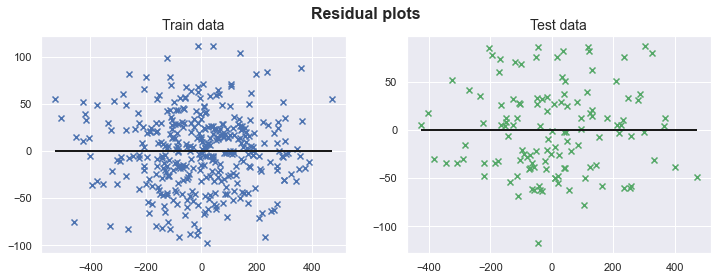

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(y_pred_train, res_train, marker='x', c='b')
plt.hlines(y = 0, xmin = min_pred_train, xmax = max_pred_train, linewidth = 2, color='k')
plt.title('Train data', size=14)

plt.subplot(1,2,2)
plt.scatter(y_pred_test, res_test, marker='x', c='g')
plt.hlines(y = 0, xmin = min_pred_test, xmax = max_pred_test, linewidth = 2, color='k')
plt.title('Test data', size=14)

plt.suptitle('Residual plots', fontsize=16, weight='bold')
plt.show()

## Regularization

Regularization is a technique used in machine learning to prevent overfitting and improve the generalization performance of models. In the context of regression, regularization involves adding a penalty term to the cost function, which penalizes the complexity of the model. The goal of regularization is to find a balance between fitting the training data well and avoiding overly complex models that do not generalize well to new, unseen data.

There are two common types of regularization techniques used in regression:

1. **L2 Regularization (Ridge Regression)**:
   - L2 regularization, also known as Ridge regression, adds a penalty term proportional to the square of the coefficients to the cost function.
   - The penalty term is controlled by a regularization parameter (\( \alpha \)).
   - The cost function of Ridge regression is the Ordinary Least Squares (OLS) cost function augmented with the regularization term:
     $$ J(\theta) = \text{OLS} + \alpha \sum_{j=1}^{n} \theta_j^2 $$
   - Ridge regression shrinks the coefficients towards zero but does not set them exactly to zero. It reduces the variance of the model at the expense of a slight increase in bias.

2. **L1 Regularization (Lasso Regression)**:
   - L1 regularization, also known as Lasso regression, adds a penalty term proportional to the absolute value of the coefficients to the cost function.
   - Like Ridge regression, the penalty term is controlled by a regularization parameter (\( \alpha \)).
   - The cost function of Lasso regression is given by:
     $$ J(\theta) = \text{OLS} + \alpha \sum_{j=1}^{n} |\theta_j| $$
   - Lasso regression performs both parameter shrinkage and feature selection by setting some coefficients exactly to zero. It can help simplify the model and improve interpretability by eliminating irrelevant or redundant features.

Regularization techniques such as Ridge and Lasso regression are valuable tools for controlling overfitting and improving the performance of regression models by penalizing complexity and encouraging simpler models that generalize well to new data.

### Ridge Regression

In [25]:
ridge = Ridge(alpha=1)      # create ridge regression object
ridge.fit(X_train_scaled, y_train) # train the model using the training sets

Ridge(alpha=1)

In [26]:
# Coeficient of determination
print('R2: %.4f' %ridge.score(X_test_scaled, y_test))

# Make predictions on the testing data
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the performance of the model through Mean Squared Error
print('MSE: %.2f' %mean_squared_error(y_test, y_pred_ridge))

R2: 0.9425
MSE: 1953.13


### Lasso Regression

In [27]:
lasso = Lasso(alpha=1)      # create ridge regression object
lasso.fit(X_train_scaled, y_train) # train the model using the training sets

Lasso(alpha=1)

In [28]:
# Coeficient of determination
print('R2: %.4f' %lasso.score(X_test_scaled, y_test))

# Make predictions on the testing data
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate the performance of the model through Mean Squared Error
print('MSE: %.2f' %mean_squared_error(y_test, y_pred_lasso))

R2: 0.9424
MSE: 1953.88
